# Plotting the output from Cumulative event counter

Notebook just for compiling raw listed cell/event counter data as heatmaps

In [2]:
import csv, glob, re, os
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as plt
from tqdm import tqdm
import render
import calculate_radial_analysis as calculate

In /home/nathan/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/nathan/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/nathan/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/nathan/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/nathan/anaconda3/lib/python3.7/site-packages/matplo

# Compile bulk analysis

N_cells, N_events, P_events, cropped versions, comparative versions with colour bar limits, coefficient of variation calculations, a statistical relevance calculation based on that and finally a combined P_events above background (probability - control probability)

### Set parameters

In [9]:
t_range = 800
radius = 800
num_bins = 10
save_parent_dir = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/expt_type_ninety_ten_{}.{}.{}'.format(radius, t_range, num_bins)

### Segregating raw lists based on experiment type

In [3]:
ninety_ten = [
# 'GV0794/Pos3',
 'GV0794/Pos8',
 #'GV0794/Pos15',
 'GV0795/Pos3',
 'GV0795/Pos8',
 'GV0795/Pos16',
 'GV0796/Pos3',
 'GV0796/Pos8',
 'GV0796/Pos19',
 'GV0796/Pos20',
 'GV0797/Pos3',
 'GV0797/Pos8',
 'GV0797/Pos18',
 #'GV0797/Pos19',
 'GV0798/Pos3',
 'GV0798/Pos8',
 'GV0798/Pos18',
 'GV0798/Pos19',
 'GV0800/Pos3',
 'GV0800/Pos8',
 'GV0800/Pos15',
 'GV0801/Pos3',
 'GV0802/Pos3',
 #'GV0804/Pos3',
 'GV0805/Pos3',
 'GV0806/Pos3',
 'GV0807/Pos3']

In [4]:
import shutil

In [8]:
for fn in os.listdir('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control'):
    expt_ID = fn.split('_')[0]+'/'+fn.split('_')[1]
    if expt_ID in ninety_ten:
        shutil.copyfile(os.path.join('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control', fn),os.path.join('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten', fn))

IndexError: list index out of range

### Either compile from raw lists (temp as iterable over different configs

In [10]:
#for config in ['400.400.10']:#['800.800.6', '600.600.8', '600.600.6', '500.500.6' '1000.1000.10', '1000.1000.6']:
#     save_parent_dir = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/210804_{}.{}.{}'.format(radius, t_range, num_bins)
#     radius = int(config.split('.')[0])
#     t_range = int(config.split('.')[1])
#     num_bins = int(config.split('.')[2])
### canon
raw_files_dir = os.path.join('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/canon_ninety_ten')
N_cells, N_events, P_events = render.cumulative_kymo_compiler(raw_files_dir, radius, t_range, num_bins)
limit = np.amax(P_events)
N = int(len(os.listdir(raw_files_dir))/2)

### control 
raw_files_dir = os.path.join('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten')
N_cells_c, N_events_c, P_events_c = render.cumulative_kymo_compiler(raw_files_dir, radius, t_range, num_bins)
limit_c = np.amax(P_events_c)
N_c = int(len(os.listdir(raw_files_dir))/2)

### save out raw arrays for coeff var
fn = os.path.join(save_parent_dir,'arrays/canon_ninety_ten_N_cell_N_event_P_event_{}.{}.{}.npz'.format(radius,t_range, num_bins))
if not os.path.exists(os.path.dirname(fn)):
    os.makedirs(os.path.dirname(fn))
fn_c = os.path.join(save_parent_dir, 'arrays/control_ninety_ten_N_cell_N_event_P_event_{}.{}.{}.npz'.format(radius,t_range, num_bins))
if not os.path.exists(os.path.dirname(fn_c)):
    os.makedirs(os.path.dirname(fn_c))
np.savez(fn, N_cells, N_events, P_events)
np.savez(fn_c, N_cells_c, N_events_c, P_events_c)

  0%|          | 0/129 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt68_N_cells_wt_rad_1600_t_range_1600_focal_t_258.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt25_N_events_wtdiv_rad_1600_t_range_1600_focal_t_68.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt146_N_cells_wt_rad_1600_t_range_1600_focal_t_148.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt68_N_events_wtdiv_rad_1600_t_range_1600_focal_t_258.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data

Filename error, could not guarantee that N_cells and N_events have same focal time. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt395_N_cells_wt_rad_1600_t_range_1600_focal_t_740.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt395_N_events_wtdiv_rad_1600_t_range_1600_focal_t_634.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt406_N_cells_wt_rad_1600_t_range_1600_focal_t_585.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt403_N_events_wtdiv_rad_1600_t_range_1600_focal_t_599.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/da

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt551_N_cells_wt_rad_1600_t_range_1600_focal_t_784.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt550_N_events_wtdiv_rad_1600_t_range_1600_focal_t_881.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt560_N_cells_wt_rad_1600_t_range_1600_focal_t_852.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt550_N_events_wtdiv_rad_1600_t_range_1600_focal_t_949.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt774_N_cells_wt_rad_1600_t_range_1600_focal_t_839.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt772_N_events_wtdiv_rad_1600_t_range_1600_focal_t_921.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt777_N_cells_wt_rad_1600_t_range_1600_focal_t_944.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt774_N_events_wtdiv_rad_1600_t_range_1600_focal_t_839.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt528_N_cells_wt_rad_1600_t_range_1600_focal_t_688.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt578_N_events_wtdiv_rad_1600_t_range_1600_focal_t_597.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt578_N_cells_wt_rad_1600_t_range_1600_focal_t_597.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt600_N_events_wtdiv_rad_1600_t_range_1600_focal_t_644.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt1218_N_cells_wt_rad_1600_t_range_1600_focal_t_946.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt962_N_events_wtdiv_rad_1600_t_range_1600_focal_t_966.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt1237_N_cells_wt_rad_1600_t_range_1600_focal_t_886.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt979_N_events_wtdiv_rad_1600_t_range_1600_focal_t_958.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt1641_N_cells_wt_rad_1600_t_range_1600_focal_t_993.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt1398_N_events_wtdiv_rad_1600_t_range_1600_focal_t_997.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt1683_N_cells_wt_rad_1600_t_range_1600_focal_t_1115.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt1421_N_events_wtdiv_rad_1600_t_range_1600_focal_t_968.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/na

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt2090_N_cells_wt_rad_1600_t_range_1600_focal_t_1177.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt1860_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1136.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt2156_N_cells_wt_rad_1600_t_range_1600_focal_t_1168.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt1861_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1134.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos8_wt255_N_cells_wt_rad_1600_t_range_1600_focal_t_519.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos8_wt11_N_events_wtdiv_rad_1600_t_range_1600_focal_t_185.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos8_wt293_N_cells_wt_rad_1600_t_range_1600_focal_t_483.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos8_wt19_N_events_wtdiv_rad_1600_t_range_1600_focal_t_183.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/da

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos8_wt1208_N_cells_wt_rad_1600_t_range_1600_focal_t_1078.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos8_wt679_N_events_wtdiv_rad_1600_t_range_1600_focal_t_732.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos8_wt1239_N_cells_wt_rad_1600_t_range_1600_focal_t_981.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos8_wt680_N_events_wtdiv_rad_1600_t_range_1600_focal_t_764.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nath

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos8_wt1602_N_cells_wt_rad_1600_t_range_1600_focal_t_1171.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos8_wt1263_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1016.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos8_wt1609_N_cells_wt_rad_1600_t_range_1600_focal_t_1021.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos8_wt1287_N_events_wtdiv_rad_1600_t_range_1600_focal_t_957.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos8_wt2107_N_cells_wt_rad_1600_t_range_1600_focal_t_1112.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos8_wt1688_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1180.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos8_wt2155_N_cells_wt_rad_1600_t_range_1600_focal_t_1167.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos8_wt1713_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1076.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt613_N_cells_wt_rad_1600_t_range_1600_focal_t_586.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt263_N_events_wtdiv_rad_1600_t_range_1600_focal_t_488.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt763_N_cells_wt_rad_1600_t_range_1600_focal_t_816.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt316_N_events_wtdiv_rad_1600_t_range_1600_focal_t_586.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt1369_N_cells_wt_rad_1600_t_range_1600_focal_t_1085.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt1018_N_events_wtdiv_rad_1600_t_range_1600_focal_t_901.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt1383_N_cells_wt_rad_1600_t_range_1600_focal_t_867.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt1071_N_events_wtdiv_rad_1600_t_range_1600_focal_t_949.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /hom

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt1916_N_cells_wt_rad_1600_t_range_1600_focal_t_1054.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt1469_N_events_wtdiv_rad_1600_t_range_1600_focal_t_839.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt1919_N_cells_wt_rad_1600_t_range_1600_focal_t_1002.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt1485_N_events_wtdiv_rad_1600_t_range_1600_focal_t_922.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /ho

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt2488_N_cells_wt_rad_1600_t_range_1600_focal_t_1069.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt2083_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1005.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt2505_N_cells_wt_rad_1600_t_range_1600_focal_t_1158.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt2099_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1126.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos3_wt691_N_cells_wt_rad_1600_t_range_1600_focal_t_342.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt2728_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1142.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos3_wt736_N_cells_wt_rad_1600_t_range_1600_focal_t_347.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos16_wt2744_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1066.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos3_wt1542_N_cells_wt_rad_1600_t_range_1600_focal_t_583.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos3_wt874_N_events_wtdiv_rad_1600_t_range_1600_focal_t_477.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos3_wt1550_N_cells_wt_rad_1600_t_range_1600_focal_t_490.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos3_wt889_N_events_wtdiv_rad_1600_t_range_1600_focal_t_476.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos3_wt2343_N_cells_wt_rad_1600_t_range_1600_focal_t_723.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos3_wt1462_N_events_wtdiv_rad_1600_t_range_1600_focal_t_598.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos3_wt2430_N_cells_wt_rad_1600_t_range_1600_focal_t_783.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos3_wt1473_N_events_wtdiv_rad_1600_t_range_1600_focal_t_713.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos3_wt3313_N_cells_wt_rad_1600_t_range_1600_focal_t_850.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos3_wt2262_N_events_wtdiv_rad_1600_t_range_1600_focal_t_725.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos3_wt3320_N_cells_wt_rad_1600_t_range_1600_focal_t_907.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos3_wt2392_N_events_wtdiv_rad_1600_t_range_1600_focal_t_635.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt58_N_cells_wt_rad_1600_t_range_1600_focal_t_78.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos3_wt3238_N_events_wtdiv_rad_1600_t_range_1600_focal_t_781.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt78_N_cells_wt_rad_1600_t_range_1600_focal_t_70.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos3_wt3251_N_events_wtdiv_rad_1600_t_range_1600_focal_t_872.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/da

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt966_N_cells_wt_rad_1600_t_range_1600_focal_t_538.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt58_N_events_wtdiv_rad_1600_t_range_1600_focal_t_78.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt986_N_cells_wt_rad_1600_t_range_1600_focal_t_643.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt58_N_events_wtdiv_rad_1600_t_range_1600_focal_t_178.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/dat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt1489_N_cells_wt_rad_1600_t_range_1600_focal_t_765.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt736_N_events_wtdiv_rad_1600_t_range_1600_focal_t_613.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt1497_N_cells_wt_rad_1600_t_range_1600_focal_t_769.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt780_N_events_wtdiv_rad_1600_t_range_1600_focal_t_643.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt2112_N_cells_wt_rad_1600_t_range_1600_focal_t_985.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt1380_N_events_wtdiv_rad_1600_t_range_1600_focal_t_781.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt2118_N_cells_wt_rad_1600_t_range_1600_focal_t_818.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt1388_N_events_wtdiv_rad_1600_t_range_1600_focal_t_852.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt2904_N_cells_wt_rad_1600_t_range_1600_focal_t_924.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt2096_N_events_wtdiv_rad_1600_t_range_1600_focal_t_893.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt2941_N_cells_wt_rad_1600_t_range_1600_focal_t_922.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt2105_N_events_wtdiv_rad_1600_t_range_1600_focal_t_919.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos19_wt830_N_cells_wt_rad_1600_t_range_1600_focal_t_450.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt2854_N_events_wtdiv_rad_1600_t_range_1600_focal_t_881.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos19_wt836_N_cells_wt_rad_1600_t_range_1600_focal_t_631.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos8_wt2956_N_events_wtdiv_rad_1600_t_range_1600_focal_t_890.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos19_wt1699_N_cells_wt_rad_1600_t_range_1600_focal_t_683.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos19_wt762_N_events_wtdiv_rad_1600_t_range_1600_focal_t_740.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos19_wt1713_N_cells_wt_rad_1600_t_range_1600_focal_t_723.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos19_wt824_N_events_wtdiv_rad_1600_t_range_1600_focal_t_387.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos19_wt2571_N_cells_wt_rad_1600_t_range_1600_focal_t_866.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos19_wt1591_N_events_wtdiv_rad_1600_t_range_1600_focal_t_732.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos19_wt2742_N_cells_wt_rad_1600_t_range_1600_focal_t_891.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos19_wt1652_N_events_wtdiv_rad_1600_t_range_1600_focal_t_777.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt564_N_cells_wt_rad_1600_t_range_1600_focal_t_409.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos19_wt2307_N_events_wtdiv_rad_1600_t_range_1600_focal_t_831.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt576_N_cells_wt_rad_1600_t_range_1600_focal_t_488.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos19_wt2388_N_events_wtdiv_rad_1600_t_range_1600_focal_t_909.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt1349_N_cells_wt_rad_1600_t_range_1600_focal_t_703.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos19_wt3347_N_events_wtdiv_rad_1600_t_range_1600_focal_t_889.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt1355_N_cells_wt_rad_1600_t_range_1600_focal_t_591.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos19_wt3364_N_events_wtdiv_rad_1600_t_range_1600_focal_t_957.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt2095_N_cells_wt_rad_1600_t_range_1600_focal_t_884.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt1157_N_events_wtdiv_rad_1600_t_range_1600_focal_t_521.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt2170_N_cells_wt_rad_1600_t_range_1600_focal_t_905.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt1196_N_events_wtdiv_rad_1600_t_range_1600_focal_t_680.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt2889_N_cells_wt_rad_1600_t_range_1600_focal_t_825.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt1726_N_events_wtdiv_rad_1600_t_range_1600_focal_t_779.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt3065_N_cells_wt_rad_1600_t_range_1600_focal_t_981.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt1729_N_events_wtdiv_rad_1600_t_range_1600_focal_t_655.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos3_wt449_N_cells_wt_rad_1600_t_range_1600_focal_t_181.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt2475_N_events_wtdiv_rad_1600_t_range_1600_focal_t_792.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos3_wt468_N_cells_wt_rad_1600_t_range_1600_focal_t_220.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt2573_N_events_wtdiv_rad_1600_t_range_1600_focal_t_971.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos3_wt1272_N_cells_wt_rad_1600_t_range_1600_focal_t_324.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt3334_N_events_wtdiv_rad_1600_t_range_1600_focal_t_913.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos3_wt1285_N_cells_wt_rad_1600_t_range_1600_focal_t_384.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt3343_N_events_wtdiv_rad_1600_t_range_1600_focal_t_984.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos3_wt1897_N_cells_wt_rad_1600_t_range_1600_focal_t_533.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos3_wt491_N_events_wtdiv_rad_1600_t_range_1600_focal_t_230.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos3_wt2069_N_cells_wt_rad_1600_t_range_1600_focal_t_411.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos3_wt503_N_events_wtdiv_rad_1600_t_range_1600_focal_t_234.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos3_wt2761_N_cells_wt_rad_1600_t_range_1600_focal_t_537.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos3_wt1420_N_events_wtdiv_rad_1600_t_range_1600_focal_t_286.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos3_wt2768_N_cells_wt_rad_1600_t_range_1600_focal_t_499.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos3_wt1443_N_events_wtdiv_rad_1600_t_range_1600_focal_t_310.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos8_wt193_N_cells_wt_rad_1600_t_range_1600_focal_t_110.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos3_wt2161_N_events_wtdiv_rad_1600_t_range_1600_focal_t_524.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos8_wt202_N_cells_wt_rad_1600_t_range_1600_focal_t_66.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos3_wt2348_N_events_wtdiv_rad_1600_t_range_1600_focal_t_651.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos8_wt632_N_cells_wt_rad_1600_t_range_1600_focal_t_383.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos3_wt2960_N_events_wtdiv_rad_1600_t_range_1600_focal_t_533.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos8_wt648_N_cells_wt_rad_1600_t_range_1600_focal_t_415.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos3_wt3007_N_events_wtdiv_rad_1600_t_range_1600_focal_t_569.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos8_wt1038_N_cells_wt_rad_1600_t_range_1600_focal_t_618.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos8_wt202_N_events_wtdiv_rad_1600_t_range_1600_focal_t_66.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos8_wt1055_N_cells_wt_rad_1600_t_range_1600_focal_t_432.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos8_wt265_N_events_wtdiv_rad_1600_t_range_1600_focal_t_255.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos8_wt1607_N_cells_wt_rad_1600_t_range_1600_focal_t_500.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos8_wt708_N_events_wtdiv_rad_1600_t_range_1600_focal_t_401.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos8_wt1619_N_cells_wt_rad_1600_t_range_1600_focal_t_644.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos8_wt721_N_events_wtdiv_rad_1600_t_range_1600_focal_t_402.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt7_N_cells_wt_rad_1600_t_range_1600_focal_t_135.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos8_wt1085_N_events_wtdiv_rad_1600_t_range_1600_focal_t_471.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt25_N_cells_wt_rad_1600_t_range_1600_focal_t_14.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos8_wt1100_N_events_wtdiv_rad_1600_t_range_1600_focal_t_441.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt653_N_cells_wt_rad_1600_t_range_1600_focal_t_312.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos8_wt1644_N_events_wtdiv_rad_1600_t_range_1600_focal_t_617.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt696_N_cells_wt_rad_1600_t_range_1600_focal_t_466.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos8_wt1662_N_events_wtdiv_rad_1600_t_range_1600_focal_t_576.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt1255_N_cells_wt_rad_1600_t_range_1600_focal_t_600.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt232_N_events_wtdiv_rad_1600_t_range_1600_focal_t_115.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt1320_N_cells_wt_rad_1600_t_range_1600_focal_t_435.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt265_N_events_wtdiv_rad_1600_t_range_1600_focal_t_160.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt1742_N_cells_wt_rad_1600_t_range_1600_focal_t_674.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt790_N_events_wtdiv_rad_1600_t_range_1600_focal_t_441.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt1752_N_cells_wt_rad_1600_t_range_1600_focal_t_544.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt802_N_events_wtdiv_rad_1600_t_range_1600_focal_t_313.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt60_N_cells_wt_rad_1600_t_range_1600_focal_t_325.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt1294_N_events_wtdiv_rad_1600_t_range_1600_focal_t_474.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt79_N_cells_wt_rad_1600_t_range_1600_focal_t_261.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt1320_N_events_wtdiv_rad_1600_t_range_1600_focal_t_435.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt663_N_cells_wt_rad_1600_t_range_1600_focal_t_422.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt1714_N_events_wtdiv_rad_1600_t_range_1600_focal_t_525.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt671_N_cells_wt_rad_1600_t_range_1600_focal_t_512.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt1730_N_events_wtdiv_rad_1600_t_range_1600_focal_t_550.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt1063_N_cells_wt_rad_1600_t_range_1600_focal_t_612.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt2176_N_events_wtdiv_rad_1600_t_range_1600_focal_t_638.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt1074_N_cells_wt_rad_1600_t_range_1600_focal_t_585.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt2184_N_events_wtdiv_rad_1600_t_range_1600_focal_t_668.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt1679_N_cells_wt_rad_1600_t_range_1600_focal_t_762.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt445_N_events_wtdiv_rad_1600_t_range_1600_focal_t_427.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt1679_N_cells_wt_rad_1600_t_range_1600_focal_t_815.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt448_N_events_wtdiv_rad_1600_t_range_1600_focal_t_399.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt2236_N_cells_wt_rad_1600_t_range_1600_focal_t_844.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt870_N_events_wtdiv_rad_1600_t_range_1600_focal_t_590.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt2255_N_cells_wt_rad_1600_t_range_1600_focal_t_867.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt879_N_events_wtdiv_rad_1600_t_range_1600_focal_t_595.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos8_wt408_N_cells_wt_rad_1600_t_range_1600_focal_t_417.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt1350_N_events_wtdiv_rad_1600_t_range_1600_focal_t_774.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos8_wt500_N_cells_wt_rad_1600_t_range_1600_focal_t_581.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt1358_N_events_wtdiv_rad_1600_t_range_1600_focal_t_649.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos8_wt883_N_cells_wt_rad_1600_t_range_1600_focal_t_726.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt1939_N_events_wtdiv_rad_1600_t_range_1600_focal_t_875.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos8_wt907_N_cells_wt_rad_1600_t_range_1600_focal_t_725.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt1941_N_events_wtdiv_rad_1600_t_range_1600_focal_t_925.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos8_wt1449_N_cells_wt_rad_1600_t_range_1600_focal_t_784.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos8_wt237_N_events_wtdiv_rad_1600_t_range_1600_focal_t_433.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos8_wt1492_N_cells_wt_rad_1600_t_range_1600_focal_t_914.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos8_wt279_N_events_wtdiv_rad_1600_t_range_1600_focal_t_401.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos8_wt1980_N_cells_wt_rad_1600_t_range_1600_focal_t_959.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos8_wt846_N_events_wtdiv_rad_1600_t_range_1600_focal_t_902.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos8_wt1981_N_cells_wt_rad_1600_t_range_1600_focal_t_890.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos8_wt849_N_events_wtdiv_rad_1600_t_range_1600_focal_t_782.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos18_wt599_N_cells_wt_rad_1600_t_range_1600_focal_t_497.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos8_wt1346_N_events_wtdiv_rad_1600_t_range_1600_focal_t_870.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos18_wt660_N_cells_wt_rad_1600_t_range_1600_focal_t_415.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos8_wt1350_N_events_wtdiv_rad_1600_t_range_1600_focal_t_769.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos18_wt1176_N_cells_wt_rad_1600_t_range_1600_focal_t_554.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos8_wt1784_N_events_wtdiv_rad_1600_t_range_1600_focal_t_805.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos18_wt1203_N_cells_wt_rad_1600_t_range_1600_focal_t_601.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos8_wt1792_N_events_wtdiv_rad_1600_t_range_1600_focal_t_842.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos18_wt1977_N_cells_wt_rad_1600_t_range_1600_focal_t_814.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos18_wt457_N_events_wtdiv_rad_1600_t_range_1600_focal_t_369.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos18_wt1997_N_cells_wt_rad_1600_t_range_1600_focal_t_956.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos18_wt475_N_events_wtdiv_rad_1600_t_range_1600_focal_t_375.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos18_wt2793_N_cells_wt_rad_1600_t_range_1600_focal_t_939.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos18_wt1176_N_events_wtdiv_rad_1600_t_range_1600_focal_t_554.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos18_wt2856_N_cells_wt_rad_1600_t_range_1600_focal_t_841.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos18_wt1203_N_events_wtdiv_rad_1600_t_range_1600_focal_t_601.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos3_wt814_N_cells_wt_rad_1600_t_range_1600_focal_t_605.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos18_wt1970_N_events_wtdiv_rad_1600_t_range_1600_focal_t_754.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos3_wt854_N_cells_wt_rad_1600_t_range_1600_focal_t_601.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos18_wt1973_N_events_wtdiv_rad_1600_t_range_1600_focal_t_752.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos3_wt1347_N_cells_wt_rad_1600_t_range_1600_focal_t_899.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos18_wt2771_N_events_wtdiv_rad_1600_t_range_1600_focal_t_850.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos3_wt1381_N_cells_wt_rad_1600_t_range_1600_focal_t_816.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos18_wt2785_N_events_wtdiv_rad_1600_t_range_1600_focal_t_928.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos3_wt2015_N_cells_wt_rad_1600_t_range_1600_focal_t_879.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos3_wt673_N_events_wtdiv_rad_1600_t_range_1600_focal_t_654.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos3_wt2032_N_cells_wt_rad_1600_t_range_1600_focal_t_1037.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos3_wt814_N_events_wtdiv_rad_1600_t_range_1600_focal_t_605.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nath

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos3_wt3009_N_cells_wt_rad_1600_t_range_1600_focal_t_1146.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos3_wt1318_N_events_wtdiv_rad_1600_t_range_1600_focal_t_901.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos3_wt3046_N_cells_wt_rad_1600_t_range_1600_focal_t_1178.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos3_wt1337_N_events_wtdiv_rad_1600_t_range_1600_focal_t_924.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt563_N_cells_wt_rad_1600_t_range_1600_focal_t_452.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos3_wt2103_N_events_wtdiv_rad_1600_t_range_1600_focal_t_976.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt625_N_cells_wt_rad_1600_t_range_1600_focal_t_552.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos3_wt2122_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1169.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nath

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt1031_N_cells_wt_rad_1600_t_range_1600_focal_t_698.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos3_wt2939_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1050.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt1038_N_cells_wt_rad_1600_t_range_1600_focal_t_665.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos3_wt2952_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1189.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt1809_N_cells_wt_rad_1600_t_range_1600_focal_t_1075.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt450_N_events_wtdiv_rad_1600_t_range_1600_focal_t_361.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt1838_N_cells_wt_rad_1600_t_range_1600_focal_t_895.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt495_N_events_wtdiv_rad_1600_t_range_1600_focal_t_566.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nath

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt2442_N_cells_wt_rad_1600_t_range_1600_focal_t_1049.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt1002_N_events_wtdiv_rad_1600_t_range_1600_focal_t_754.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt2449_N_cells_wt_rad_1600_t_range_1600_focal_t_1176.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt1003_N_events_wtdiv_rad_1600_t_range_1600_focal_t_735.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt3218_N_cells_wt_rad_1600_t_range_1600_focal_t_1172.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt1600_N_events_wtdiv_rad_1600_t_range_1600_focal_t_936.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt8_N_cells_wt_rad_1600_t_range_1600_focal_t_61.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt1601_N_events_wtdiv_rad_1600_t_range_1600_focal_t_957.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt726_N_cells_wt_rad_1600_t_range_1600_focal_t_628.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt2459_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1048.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt729_N_cells_wt_rad_1600_t_range_1600_focal_t_629.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos8_wt2552_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1022.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt1351_N_cells_wt_rad_1600_t_range_1600_focal_t_824.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt8_N_events_wtdiv_rad_1600_t_range_1600_focal_t_61.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt1355_N_cells_wt_rad_1600_t_range_1600_focal_t_729.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt15_N_events_wtdiv_rad_1600_t_range_1600_focal_t_109.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt2293_N_cells_wt_rad_1600_t_range_1600_focal_t_1097.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt766_N_events_wtdiv_rad_1600_t_range_1600_focal_t_619.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt2299_N_cells_wt_rad_1600_t_range_1600_focal_t_1049.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt766_N_events_wtdiv_rad_1600_t_range_1600_focal_t_737.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt3146_N_cells_wt_rad_1600_t_range_1600_focal_t_1188.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt1502_N_events_wtdiv_rad_1600_t_range_1600_focal_t_829.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt3167_N_cells_wt_rad_1600_t_range_1600_focal_t_1167.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt1630_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1108.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /h

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0801_Pos3_wt38_N_cells_wt_rad_1600_t_range_1600_focal_t_212.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt2637_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1023.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0801_Pos3_wt39_N_cells_wt_rad_1600_t_range_1600_focal_t_198.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt2678_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1027.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0801_Pos3_wt992_N_cells_wt_rad_1600_t_range_1600_focal_t_644.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt3318_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1143.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0801_Pos3_wt1005_N_cells_wt_rad_1600_t_range_1600_focal_t_778.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0800_Pos15_wt3335_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1124.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0801_Pos3_wt1875_N_cells_wt_rad_1600_t_range_1600_focal_t_952.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0801_Pos3_wt610_N_events_wtdiv_rad_1600_t_range_1600_focal_t_805.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0801_Pos3_wt1952_N_cells_wt_rad_1600_t_range_1600_focal_t_900.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0801_Pos3_wt635_N_events_wtdiv_rad_1600_t_range_1600_focal_t_556.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0801_Pos3_wt2884_N_cells_wt_rad_1600_t_range_1600_focal_t_1056.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0801_Pos3_wt1224_N_events_wtdiv_rad_1600_t_range_1600_focal_t_866.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0801_Pos3_wt3135_N_cells_wt_rad_1600_t_range_1600_focal_t_1138.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0801_Pos3_wt1239_N_events_wtdiv_rad_1600_t_range_1600_focal_t_904.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0802_Pos3_wt308_N_cells_wt_rad_1600_t_range_1600_focal_t_412.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0801_Pos3_wt2507_N_events_wtdiv_rad_1600_t_range_1600_focal_t_965.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0802_Pos3_wt401_N_cells_wt_rad_1600_t_range_1600_focal_t_296.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0801_Pos3_wt2560_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1057.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nath

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0802_Pos3_wt1325_N_cells_wt_rad_1600_t_range_1600_focal_t_712.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0801_Pos3_wt3927_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1167.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0802_Pos3_wt1359_N_cells_wt_rad_1600_t_range_1600_focal_t_698.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0801_Pos3_wt3958_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1102.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0802_Pos3_wt2064_N_cells_wt_rad_1600_t_range_1600_focal_t_886.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0802_Pos3_wt577_N_events_wtdiv_rad_1600_t_range_1600_focal_t_436.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0802_Pos3_wt2077_N_cells_wt_rad_1600_t_range_1600_focal_t_1119.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0802_Pos3_wt658_N_events_wtdiv_rad_1600_t_range_1600_focal_t_478.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nath

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0802_Pos3_wt3410_N_cells_wt_rad_1600_t_range_1600_focal_t_996.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0802_Pos3_wt1631_N_events_wtdiv_rad_1600_t_range_1600_focal_t_733.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0802_Pos3_wt3415_N_cells_wt_rad_1600_t_range_1600_focal_t_904.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0802_Pos3_wt1668_N_events_wtdiv_rad_1600_t_range_1600_focal_t_713.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt54_N_cells_wt_rad_1600_t_range_1600_focal_t_175.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0802_Pos3_wt2935_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1135.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt58_N_cells_wt_rad_1600_t_range_1600_focal_t_891.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0802_Pos3_wt3053_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1068.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt928_N_cells_wt_rad_1600_t_range_1600_focal_t_624.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0802_Pos3_wt4485_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1011.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt950_N_cells_wt_rad_1600_t_range_1600_focal_t_770.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0802_Pos3_wt4593_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1147.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt1663_N_cells_wt_rad_1600_t_range_1600_focal_t_862.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt717_N_events_wtdiv_rad_1600_t_range_1600_focal_t_662.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt1673_N_cells_wt_rad_1600_t_range_1600_focal_t_926.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt757_N_events_wtdiv_rad_1600_t_range_1600_focal_t_644.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt2109_N_cells_wt_rad_1600_t_range_1600_focal_t_831.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt1539_N_events_wtdiv_rad_1600_t_range_1600_focal_t_915.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt2154_N_cells_wt_rad_1600_t_range_1600_focal_t_963.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt1572_N_events_wtdiv_rad_1600_t_range_1600_focal_t_885.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt3134_N_cells_wt_rad_1600_t_range_1600_focal_t_1106.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt2257_N_events_wtdiv_rad_1600_t_range_1600_focal_t_989.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt3147_N_cells_wt_rad_1600_t_range_1600_focal_t_994.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt2279_N_events_wtdiv_rad_1600_t_range_1600_focal_t_963.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/na

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt71_N_cells_wt_rad_1600_t_range_1600_focal_t_129.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt3007_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1126.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt152_N_cells_wt_rad_1600_t_range_1600_focal_t_407.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0805_Pos3_wt3134_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1106.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nath

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt1231_N_cells_wt_rad_1600_t_range_1600_focal_t_504.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt526_N_events_wtdiv_rad_1600_t_range_1600_focal_t_315.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt1281_N_cells_wt_rad_1600_t_range_1600_focal_t_567.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt562_N_events_wtdiv_rad_1600_t_range_1600_focal_t_211.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt1951_N_cells_wt_rad_1600_t_range_1600_focal_t_598.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt1360_N_events_wtdiv_rad_1600_t_range_1600_focal_t_576.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt2071_N_cells_wt_rad_1600_t_range_1600_focal_t_564.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt1382_N_events_wtdiv_rad_1600_t_range_1600_focal_t_934.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt3637_N_cells_wt_rad_1600_t_range_1600_focal_t_997.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt1919_N_events_wtdiv_rad_1600_t_range_1600_focal_t_702.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt3660_N_cells_wt_rad_1600_t_range_1600_focal_t_760.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt1951_N_events_wtdiv_rad_1600_t_range_1600_focal_t_598.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nat

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt5886_N_cells_wt_rad_1600_t_range_1600_focal_t_1003.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt3340_N_events_wtdiv_rad_1600_t_range_1600_focal_t_783.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt6172_N_cells_wt_rad_1600_t_range_1600_focal_t_1003.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt3379_N_events_wtdiv_rad_1600_t_range_1600_focal_t_774.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0807_Pos3_wt436_N_cells_wt_rad_1600_t_range_1600_focal_t_544.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt4816_N_events_wtdiv_rad_1600_t_range_1600_focal_t_967.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0807_Pos3_wt440_N_cells_wt_rad_1600_t_range_1600_focal_t_676.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0806_Pos3_wt4850_N_events_wtdiv_rad_1600_t_range_1600_focal_t_842.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0807_Pos3_wt1086_N_cells_wt_rad_1600_t_range_1600_focal_t_862.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0807_Pos3_wt121_N_events_wtdiv_rad_1600_t_range_1600_focal_t_248.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0807_Pos3_wt1111_N_cells_wt_rad_1600_t_range_1600_focal_t_859.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0807_Pos3_wt153_N_events_wtdiv_rad_1600_t_range_1600_focal_t_296.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/natha

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0807_Pos3_wt1847_N_cells_wt_rad_1600_t_range_1600_focal_t_1081.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0807_Pos3_wt842_N_events_wtdiv_rad_1600_t_range_1600_focal_t_780.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0807_Pos3_wt1887_N_cells_wt_rad_1600_t_range_1600_focal_t_922.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0807_Pos3_wt901_N_events_wtdiv_rad_1600_t_range_1600_focal_t_780.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nath

Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0807_Pos3_wt2564_N_cells_wt_rad_1600_t_range_1600_focal_t_1094.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0807_Pos3_wt1716_N_events_wtdiv_rad_1600_t_range_1600_focal_t_996.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0807_Pos3_wt2618_N_cells_wt_rad_1600_t_range_1600_focal_t_1015.csv /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0807_Pos3_wt1727_N_events_wtdiv_rad_1600_t_range_1600_focal_t_903.csv
Filename error, could not guarantee that N_cells and N_events are from the same scan. Filenames: /home/n

### Or load from previously compiles .npz stacks of N_cells, N_events, P_events

In [ ]:
### load npz
with np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/arrays/attempt5_arrays_only_800.800.20/arrays/canon_N_cell_N_event_P_event_800.800.20.npz') as data:
    N_cells = data['arr_0']
    N_events = data['arr_1']
    P_events = data['arr_2']
with np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/arrays/attempt5_arrays_only_800.800.20/arrays/control_N_cell_N_event_P_event_800.800.20.npz') as data:
    N_cells_c = data['arr_0']
    N_events_c = data['arr_1']
    P_events_c = data['arr_2']
N_c = 10491
N = 1839
limit_c = np.amax(P_events_c)
limit = np.amax(P_events)
cbar_lim = tuple((0, max(limit_c, limit)))

In [11]:
render.MEGAPLOT(N_cells, N_events, P_events, N_cells_c, N_events_c, P_events_c, N, N_c, limit, limit_c, cbar_lim, radius, t_range, num_bins, save_parent_dir)

NameError: name 'cbar_lim' is not defined

# Iterating over several different scales with bulk output

starting dimensions radius, t_range, num_bins: 200 200 10
Thank you for choosing MEGAPLOT


Filename /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_200.200.10/uncrop_unlim/scr_apop_wt_div/Spatiotemporal dist. of probability of wild-type divisions 
 around Scribble apoptoses (N=1839) 200.200.10.pdf already exists, saving as updated copy
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_200.200.10/uncrop_unlim/scr_apop_wt_div/Spatiotemporal dist. of probability of wild-type divisions 
 around Scribble apoptoses (N=1839) 200.200.10 (updated 20210804-203054).pdf
Filename /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_200.200.10/uncrop_unlim/scr_apop_wt_div/Spatiotemporal dist. of wild-type divisions 
 around Scribble apoptoses (N=1839) 200.200.10.pdf already exists, saving as updated copy
Plot saved at  /home/nathan/data/kraken/h2b/g

/home/nathan/analysis/cell-comp-analysis/radial_analysis/render.py:670: RuntimeWarning: divide by zero encountered in true_divide
  cv = np.nan_to_num(np.sqrt((1-P_events)/(P_events*N_cells)), posinf = 1)


Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_200.200.10/CV/scr_apop_wt_div/Coefficient of variation of probability of wild-type divisions 
 around Scribble apoptoses (N=1839) 200.200.10 (updated 20210804-203058).pdf
Filename /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_200.200.10/CV/wt_cont_wt_div/Coefficient of variation of probability of wild-type divisions 
 around wild-type random time points (N=10491) 200.200.10.pdf already exists, saving as updated copy


/home/nathan/analysis/cell-comp-analysis/radial_analysis/render.py:692: RuntimeWarning: divide by zero encountered in true_divide
  cv_c = np.nan_to_num(np.sqrt(((1-P_events_c)/(P_events_c*N_cells_c))), posinf = 1)


Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_200.200.10/CV/wt_cont_wt_div/Coefficient of variation of probability of wild-type divisions 
 around wild-type random time points (N=10491) 200.200.10 (updated 20210804-203058).pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_200.200.10/CV/wt_cont_wt_div/Statisticall relevant areas of probability of wild-type divisions 
 around wild-type random time points (N=10491) 200.200.10.pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_200.200.10/combined/Difference in probability between 
canonical and control analysis 
i.e. probability of division above background 200.200.10.pdf
Plots saved out
starting dimensions radius, t_range, num_bins: 400 400 10
Thank you for choosing MEGAPLOT


Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_outpu

Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.10/CV/scr_apop_wt_div/Coefficient of variation of probability of wild-type divisions 
 around Scribble apoptoses (N=1839) 800.800.10.pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.10/CV/wt_cont_wt_div/Coefficient of variation of probability of wild-type divisions 
 around wild-type random time points (N=10491) 800.800.10.pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.10/CV/wt_cont_wt_div/Statisticall relevant areas of probability of wild-type divisions 
 around wild-type random time points (N=10491) 800.800.10.pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.10/combined/Difference in probability between 
canonical and control analysis 
i.e. probab

/home/nathan/analysis/cell-comp-analysis/radial_analysis/render.py:670: RuntimeWarning: divide by zero encountered in true_divide
  cv = np.nan_to_num(np.sqrt((1-P_events)/(P_events*N_cells)), posinf = 1)


Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_600.600.20/CV/scr_apop_wt_div/Coefficient of variation of probability of wild-type divisions 
 around Scribble apoptoses (N=1839) 600.600.20.pdf


/home/nathan/analysis/cell-comp-analysis/radial_analysis/render.py:692: RuntimeWarning: divide by zero encountered in true_divide
  cv_c = np.nan_to_num(np.sqrt(((1-P_events_c)/(P_events_c*N_cells_c))), posinf = 1)


Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_600.600.20/CV/wt_cont_wt_div/Coefficient of variation of probability of wild-type divisions 
 around wild-type random time points (N=10491) 600.600.20.pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_600.600.20/CV/wt_cont_wt_div/Statisticall relevant areas of probability of wild-type divisions 
 around wild-type random time points (N=10491) 600.600.20.pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_600.600.20/combined/Difference in probability between 
canonical and control analysis 
i.e. probability of division above background 600.600.20.pdf
Plots saved out
starting dimensions radius, t_range, num_bins: 800 800 20
Thank you for choosing MEGAPLOT


Filename /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/

Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.20/CV/wt_cont_wt_div/Coefficient of variation of probability of wild-type divisions 
 around wild-type random time points (N=10491) 800.800.20 (updated 20210804-203118).pdf
Filename /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.20/CV/wt_cont_wt_div/Statisticall relevant areas of probability of wild-type divisions 
 around wild-type random time points (N=10491) 800.800.20.pdf already exists, saving as updated copy
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.800.20/CV/wt_cont_wt_div/Statisticall relevant areas of probability of wild-type divisions 
 around wild-type random time points (N=10491) 800.800.20 (updated 20210804-203119).pdf
Filename /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_800.80

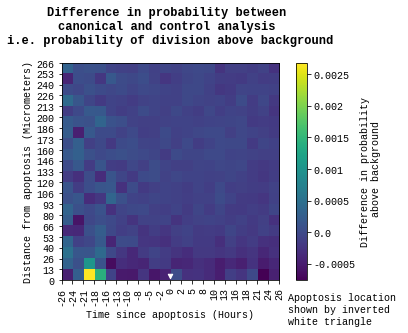

In [3]:
for config in ['200.200.10', '400.400.10', '800.800.10', '600.600.20', '800.800.20']:
    radius = int(config.split('.')[0])
    t_range = int(config.split('.')[1])
    num_bins = int(config.split('.')[2])
    print('starting dimensions radius, t_range, num_bins:',radius, t_range, num_bins)
    save_parent_dir = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/plots/210804_{}.{}.{}'.format(radius, t_range, num_bins)
    ### load npz
    with np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/arrays/canon_N_cell_N_event_P_event_{}.{}.{}.npz'.format(radius, t_range, num_bins, radius, t_range, num_bins)) as data:
        N_cells = data['arr_0']
        N_events = data['arr_1']
        P_events = data['arr_2']
    with np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/arrays/control_N_cell_N_event_P_event_{}.{}.{}.npz'.format(radius, t_range, num_bins, radius, t_range, num_bins)) as data:
        N_cells_c = data['arr_0']
        N_events_c = data['arr_1']
        P_events_c = data['arr_2']
    N_c = 10491
    N = 1839
    limit_c = np.amax(P_events_c)
    limit = np.amax(P_events)
    cbar_lim = tuple((0, max(limit_c, limit)))
    render.MEGAPLOT(N_cells, N_events, P_events, N_cells_c, N_events_c, P_events_c, N, N_c, limit, limit_c, cbar_lim, radius, t_range, num_bins, save_parent_dir)

# Single probability heatmap (skip for bulk generation)

### Set parent directory of raw .csv files

In [4]:
raw_files_dir = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/raw_lists/1600.1600/control'

### Set the dimensions of the heatmap

In [2]:
radius, t_range, num_bins = 800,800,10

In [4]:
### CANON
focal_cell = 'Scr'
focal_event = 'APOPTOSIS'
subject_cell = 'wt'
subject_event = 'DIVISION'

In [7]:
### CONTROL
focal_cell = 'wt'
focal_event = 'control'
subject_cell = 'wt'
subject_event = 'DIVISION'

### Compile single cumulative probability heatmap

In [ ]:
N_cells, N_events, P_events = render.cumulative_kymo_compiler(raw_files_dir, radius, t_range, num_bins)

  0%|          | 0/10491 [00:00<?, ?it/s]

In [ ]:
render.auto_plot_cumulative(P_events,
                     'P_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event, 
                      '',#save_parent_dir ,
                      '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)